In [1]:
#LESJ_知財に関する統合報告書大賞_企業別形態素解析出力
# テキストをリスト単位で取り込み、リスト単位で形態素解析
import pandas as pd
import MeCab
import fitz
import re
import sys
sys.path.append('/work_dir') 
import talknize_module_20240909 as tk
import csv


In [2]:
#形態素解析の前処理
#分析対象データの特性に対応するため、前処理はモジュールではなくコードとして記載
#talknize_module.pyにも標準的な処理も記載し、適宜使い分け可能にする

#----------------------------------------------------------------------
#テキストファイルの各行に記載された文字列を、処理用文字列として整形・リスト化
def text_to_list(file_path):

    # 空のリストを作成
    return_list = []
    try:
        # 指定されたファイルを読み込み、各行をリストに追加
        with open(file_path, 'r') as file:
            # ファイル内の各行をループし、行末の改行や余分な空白を除去してリストに格納
            return_list = [line.strip() for line in file]
    # ファイルが存在しない場合は例外を無視する
    except FileNotFoundError:
        pass
    # リストを返す
    return return_list

#----------------------------------------------------------------------
#形態素解析前のテキストデータ処理（
#形態素解析の前に、無駄な記号やヘッダ・フッタ等の文言をテキストから除外
def pre_tk(text, excl_list):

    replaced_text = text

    #exclusion_list処理前に処理する必要のあるもの
    #【特例処理】除外処理前に、文頭のこれら記号は「箇条書き」とみなし、続く文言を一文として扱う
    replaced_text = re.sub(r'[■□▪▫▲△▶▷▸▹▼▽◆◇●〇]', '。\n', replaced_text)
    #replaced_text = re.sub(r'[〇●◇◆□■▶△▲▽▼▫▪▹▶▸]', '', replaced_text)#上記以外は除去

    exclusion_list = []    
    exclusion_file1 = "userdic/exclusion_phrases1.txt"  # 各企業の除外フレーズを記載したリスト
    exclusion_file2 = "userdic/exclusion_codes.txt"  # その他記号・年月日・URL等を除外するためのリスト
    #exclusion_file3 = "userdic/exclusion_phrases2.txt"  # 各企業の除外フレーズを記載したリスト2（pageinfoから都度取り込み）
#    exclusion_list = text_to_list(exclusion_file1) + text_to_list(exclusion_file2)+ text_to_list(exclusion_file3)
    exclusion_list = excl_list + text_to_list(exclusion_file1) + text_to_list(exclusion_file2)

    for pattern in exclusion_list:
        replaced_text = re.sub(pattern, ' ', replaced_text)

    return replaced_text


In [3]:
#形態素解析の後処理
#形態素解析結果（tokenリスト）から、ストップワード、特定の条件の文字列等を除外
#import fitz
#import re
from collections import OrderedDict
import re

def post_tk(tokens):
    
    replaced_list = tokens    

    # stopwords（ファイルに格納）を除去
    path_stopwords = "userdic/stopwords.txt"
    stopwords = text_to_list(path_stopwords)
    stopwords = list(OrderedDict.fromkeys(stopwords)) # 元の順序を保持しつつ、重複を除去（# Python 3.7以降）
    replaced_list = [t for t in replaced_list if t not in stopwords]
    
    # ひらがなのみの要素を除去
    kana_re = re.compile("^[ぁ-ゖ]+$")
    replaced_list = [t for t in replaced_list if not kana_re.match(t)]

    # アルファベット1文字のみの要素を除去
    alphabet_re = re.compile("^[a-zA-Z]$")
    replaced_list = [t for t in replaced_list if not alphabet_re.match(t)]

    #特定の形態の数値要素を除去
    number_re = re.compile("^[\d,]+")
    replaced_list = [t for t in replaced_list if not number_re.match(t)]

    
    return replaced_list

In [4]:
# 比較評価用のファイルを取り込み

target_dir = 'data/'

#target_file = "知的資本テキスト_オリジナル.txt"
#target_file = '知的資本テキスト_参考案.txt'
#target_file = '知的資本テキスト_参考案2.txt'
target_file = '知的資本テキスト_参考案old.txt'

#df_target_file = pd.read_csv(target_dir+target_file)
with open(target_dir+target_file, 'r') as f:
    target_doc = f.read()

print(target_doc)

　自動運転や走行状態に応じたモータ制御、エネルギーマネジメントなど、モビリティの価値を高める上で、ソフトウェアの重要性は一層高まりつつあります。またこれに伴い、車載半導体の重要性も増しています。
さらに自動車産業の産業構造は、カーメーカー（委託者）－製造者（受託者）の垂直統合的体制から、カーメーカー・製造者・ＩＴ企業等の水平分業的な企画・設計・製造体制へと変わりつつあります。

　こうした中長期的な環境変化をふまえ、デンソーはビジネスモデルの変革に取り組んでいます。
事業ポートフォリオの転換とともに、ソフトウェアによる価値創出にも注力し、さらに競争力を高めていきます。

　電動化や自動運転などで役割が増大する半導体領域では、自社の強み・特徴を活かしつつ、競争力・供給能力の基盤固めを着実に遂行します。
車載半導体開発においては、半世紀以上の半導体研究の成果を活用しつつ、アライアンスも積極的に推進します。
センサ領域では、社内R&D組織の強化や専門性の高い半導体ベンダーとの開発連携を図ります。
車両制御の高度化に欠かせないマイコン・SoCなどのロジック半導体領域では、最先端の民生技術の活用を図ります。

　また、資本効率を意識した経営の実践に向け、ROICツリーの社内展開を通じたROIC経営を推進しています。
各部・個人が行う開発の効率化や新製品の投入・拡販等の活動がROICの向上にどのようにつながるかを可視化しつつ、各種取り組みを推進しています。
例えばソフトウェア開発の現場では、テスト工程の徹底した自動化による開発期間短縮を通じ、投資金額を大きく上回る効果を挙げています。

このような取り組みを通じ、世界初製品の創出、CASE分野での拡販、他社活用可能特許の増産などを実現し、自動車業界内外での競争優位を確立します。

　さらに、大学や公的研究機関、スタートアップを含むパートナー企業等と組織を超えた連携・交流を図りつつ、最先端技術・基盤技術の事業化に取り組みます。
デンソー単体では気づきにくい自社の強みを認識し、有効に活用しつつ、産業界・学界の知の循環を促します。

　デンソーは総合システムサプライヤーとして、真に価値のある製品・システムづくりを通じ、社会課題の解決と企業価値の向上を両立します。



In [5]:
# 分割してリストに格納
target_sentences = [s.strip() for s in re.split(r"。|\n", target_doc)]
target_sentences = [x for x in target_sentences if x]
target_sentences

['自動運転や走行状態に応じたモータ制御、エネルギーマネジメントなど、モビリティの価値を高める上で、ソフトウェアの重要性は一層高まりつつあります',
 'またこれに伴い、車載半導体の重要性も増しています',
 'さらに自動車産業の産業構造は、カーメーカー（委託者）－製造者（受託者）の垂直統合的体制から、カーメーカー・製造者・ＩＴ企業等の水平分業的な企画・設計・製造体制へと変わりつつあります',
 'こうした中長期的な環境変化をふまえ、デンソーはビジネスモデルの変革に取り組んでいます',
 '事業ポートフォリオの転換とともに、ソフトウェアによる価値創出にも注力し、さらに競争力を高めていきます',
 '電動化や自動運転などで役割が増大する半導体領域では、自社の強み・特徴を活かしつつ、競争力・供給能力の基盤固めを着実に遂行します',
 '車載半導体開発においては、半世紀以上の半導体研究の成果を活用しつつ、アライアンスも積極的に推進します',
 'センサ領域では、社内R&D組織の強化や専門性の高い半導体ベンダーとの開発連携を図ります',
 '車両制御の高度化に欠かせないマイコン・SoCなどのロジック半導体領域では、最先端の民生技術の活用を図ります',
 'また、資本効率を意識した経営の実践に向け、ROICツリーの社内展開を通じたROIC経営を推進しています',
 '各部・個人が行う開発の効率化や新製品の投入・拡販等の活動がROICの向上にどのようにつながるかを可視化しつつ、各種取り組みを推進しています',
 '例えばソフトウェア開発の現場では、テスト工程の徹底した自動化による開発期間短縮を通じ、投資金額を大きく上回る効果を挙げています',
 'このような取り組みを通じ、世界初製品の創出、CASE分野での拡販、他社活用可能特許の増産などを実現し、自動車業界内外での競争優位を確立します',
 'さらに、大学や公的研究機関、スタートアップを含むパートナー企業等と組織を超えた連携・交流を図りつつ、最先端技術・基盤技術の事業化に取り組みます',
 'デンソー単体では気づきにくい自社の強みを認識し、有効に活用しつつ、産業界・学界の知の循環を促します',
 'デンソーは総合システムサプライヤーとして、真に価値のある製品・システムづくりを通じ、社会課題の解決と企業価値の向上を両立します']

In [6]:
# 形態素に分解

In [7]:
# 平均文長の計算

In [8]:
# エントロピーの計算

In [9]:
# 漢字使用率

In [10]:
#ページインデックス付きで、形態素解析結果をページ単位で格納
tokenized_page_text = [(index, post_tk(tk.mecab_tokenizer(pre_tk(item, []))))for index, item in enumerate(target_sentences)]
tokenized_page_text[1]

(1, ['車載', '半導体', '重要性'])

In [11]:
#ページインデックス付きで、形態素解析結果をページ単位で格納
#tokenized_page_text = [(index, post_tk(tk.mecab_tokenizer(pre_tk(item, eliminate_list))))for index, item in enumerate(page_text)]

In [12]:
#抽出ページ単位の形態素リスト
#Extracted_tokenized_page_text = [(index, sublist) for index, sublist in tokenized_page_text if index in man_page_index]
Extracted_tokenized_page_text = tokenized_page_text
#該当ページのインデックスリスト
#Extracted_tokenized_page_index = [index for index, sublist in tokenized_page_text if index in man_page_index]
Extracted_tokenized_page_index = [index for index, sublist in tokenized_page_text]
#形態素解析前の抽出ページ単位テキスト
#Extracted_page_text = [page_text[i] for i in man_page_index]
Extracted_page_text = [target_doc]

In [13]:
#以降、Wordlist/WordcloudとCentrality,Network図作成
from collections import Counter
import pandas as pd
import itertools
import datetime


In [14]:
#ファイル出力時に使用する年月日文字列の取得（全処理共通）
# 現在の日付と時刻を取得
now = datetime.datetime.now()
# 年月日と時刻の文字列を生成
date_time_string = now.strftime("%Y%m%d-%H%M%S")

In [15]:
#Word_listの作成
#抽出されたページの形態素（サブリスト）を一つのリストにまとめる
Merged_Extracted_tokenized_list = [item for _, sublist in Extracted_tokenized_page_text for item in sublist]
#print(Merged_Extracted_tokenized_list)
#辞書形式で単語をカウント
counter = Counter(Merged_Extracted_tokenized_list)

# 単語、件数をDataFrameに格納
count_df = pd.DataFrame(list(counter.items()), columns=['単語', '件数'])
# DataFrameを件数でソート
count_df = count_df.sort_values(by='件数', ascending=False)

industry=''
company_code=''
company_name=''
analysis_area=''
doc_name=''
# 新しい列を追加
#count_df.insert(0, '業種', industry)
#count_df.insert(1, 'コード', company_code)
#count_df.insert(2, '企業名', company_name)
#count_df.insert(3, '分析範囲', analysis_area)
# 結果をCSVファイルに出力
file_name = f"output/{company_code}_{company_name}_{date_time_string}_Word_list.csv"
count_df.to_csv(file_name, encoding="utf_8_sig", index=False)

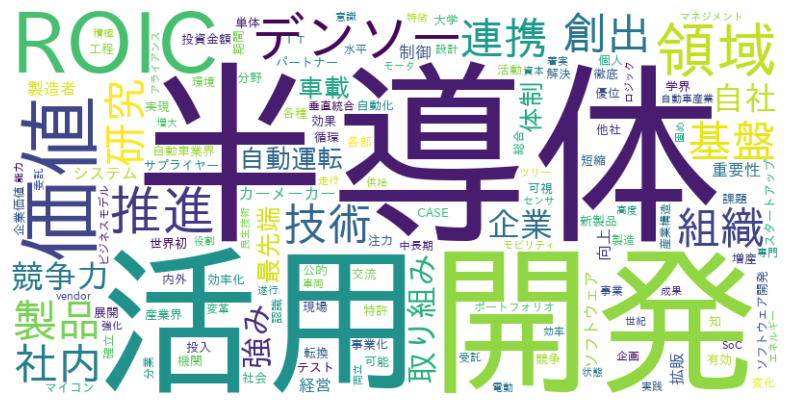

In [16]:
#抽出単語によるワードクラウド作成
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 日本語フォントのパスを指定
jp_font_path = '/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf'

# ワードクラウドのフォーマット指定
wordcloud = WordCloud(width=800, height=400, background_color='white',font_path=jp_font_path)
# 単語とその頻度を辞書形式に変換
word_freq = {word: freq for word, freq in zip(count_df['単語'], count_df['件数'])}
# ワードクラウドの生成
wordcloud.generate_from_frequencies(word_freq)

# プロット
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 結果をpngファイルに出力
#file_name_wordcloud=f'output/{company_code}_{company_name}_{date_time_string}_WordCloud.png'
#wordcloud.to_file(file_name_wordcloud)

In [17]:
#tf-idf用に、ファイル名、企業名、トークンを出力

# データフレームの作成：pdfファイル名とトークンを格納
#df_token = pd.DataFrame({"company_name": company_name, "doc_name": doc_name, "token": [Merged_Extracted_tokenized_list]})

#file_name_token=f'output/{company_code}_{company_name}_{date_time_string}_Token.csv'
#df_token.to_csv(file_name_token, encoding="utf_8_sig", index=False)

In [18]:
#以降、共起分析
#Extracted_page_text（抽出ページ単位のリスト）を、要素一つのリストに集約
#Merged_Extracted_page_text = "\n\n".join(Extracted_page_text)
#print(Merged_Extracted_page_text)

#前処理したテキストを準備
#Processed_Merged_Extracted_page_text = pre_tk(Merged_Extracted_page_text, eliminate_list)
#print(Processed_Merged_Extracted_page_text)

#集約・前処理したテキストを「。」で区切り、形態素解析（共起分析用）
#sentences = [post_tk(tk.mecab_tokenizer(sentence)) for sentence in re.split("。", Processed_Merged_Extracted_page_text)]
sentences = [(post_tk(tk.mecab_tokenizer(pre_tk(item, []))))for index, item in enumerate(target_sentences)]

print(sentences)

[['自動運転', '走行', '状態', 'モータ', '制御', 'エネルギー', 'マネジメント', 'モビリティ', '価値', 'ソフトウェア', '重要性'], ['車載', '半導体', '重要性'], ['自動車産業', '産業構造', 'カーメーカー', '委託', '製造者', '受託', '垂直統合', '体制', 'カーメーカー', '製造者', 'ＩＴ', '企業', '水平', '分業', '企画', '設計', '製造', '体制'], ['中長期', '環境', '変化', 'デンソー', 'ビジネスモデル', '変革'], ['事業', 'ポートフォリオ', '転換', 'ソフトウェア', '価値', '創出', '注力', '競争力'], ['電動', '自動運転', '役割', '増大', '半導体', '領域', '自社', '強み', '特徴', '競争力', '供給', '能力', '基盤', '固め', '着実', '遂行'], ['車載', '半導体', '開発', '世紀', '半導体', '研究', '成果', '活用', 'アライアンス', '積極', '推進'], ['センサ', '領域', '社内', '組織', '強化', '専門', '半導体', 'vendor', '開発', '連携'], ['車両', '制御', '高度', 'マイコン', 'SoC', 'ロジック', '半導体', '領域', '最先端', '民生技術', '活用'], ['資本', '効率', '意識', '経営', '実践', 'ROIC', 'ツリー', '社内', '展開', 'ROIC', '経営', '推進'], ['各部', '個人', '開発', '効率化', '新製品', '投入', '拡販', '活動', 'ROIC', '向上', '可視', '各種', '取り組み', '推進'], ['ソフトウェア開発', '現場', 'テスト', '工程', '徹底', '自動化', '開発', '期間', '短縮', '投資金額', '効果'], ['取り組み', '世界初', '製品', '創出', 'CASE', '分野', '拡販', '他社', '活用', '可能', '特許', '増産', '実現', '自動車

In [19]:
#各文中の、形態素組み合わせを作る
sentences_combs = [list(itertools.combinations(sentence,2)) for sentence in sentences]
#print(sentences_combs[0])

#組み合わせた2つの形態素の並びをソート
words_combs = [[tuple(sorted(words)) for words in sentence] for sentence in sentences_combs]
#print(words_combs[0][:30])
target_combs = []
for words_comb in words_combs:
    target_combs.extend(words_comb)
ct = Counter(target_combs)
#print(ct)
df = pd.DataFrame([{"1番目" : i[0][0], "2番目": i[0][1], "count":i[1]} for i in ct.most_common()])

#ファイル出力
file_name_comb = f"output/{company_code}_{company_name}_{date_time_string}_Co_Occurrence.csv"
df.to_csv(file_name_comb, encoding="utf_8_sig", index=False)

In [20]:
df.head(30)

,1番目,2番目,count
0,カーメーカー,製造者,4
1,カーメーカー,体制,4
2,体制,製造者,4
3,ROIC,経営,4
4,半導体,車載,3
5,半導体,領域,3
6,半導体,開発,3
7,半導体,活用,3
8,ROIC,推進,3
9,ソフトウェア,価値,2


In [21]:
#ネットワーク分析の下準備
import networkx as nx
from networkx.algorithms.community import girvan_newman
import network_plot_module as npm
import json

#########################################################
# 分析対象とする共起単語の組み合わせ数（ノード数）を指定
analyzed_links = 500
limited_df = df.head(analyzed_links)
#########################################################
# DataFrameからネットワークを作成
G = nx.from_pandas_edgelist(limited_df, '1番目', '2番目', ['count'])


In [22]:
#print(G)
#limited_df.head(30)

In [23]:
# 各ノードの中心性を計算
try:
    degree_centrality = nx.degree_centrality(G)
except:
    degree_centrality = {node: '' for node in G.nodes()}
    
try:
    betweenness_centrality = nx.betweenness_centrality(G)
except:
    betweenness_centrality = {node: '' for node in G.nodes()}

try:
    closeness_centrality = nx.closeness_centrality(G)
except:
    closeness_centrality = {node: '' for node in G.nodes()}

try:
    eigenvector_centrality = nx.eigenvector_centrality(G)
except:
    eigenvector_centrality = {node: '' for node in G.nodes()}

try:
    katz_centrality = nx.katz_centrality(G)
except:
    katz_centrality = {node: '' for node in G.nodes()}

# Girvan-Newmanアルゴリズムでコミュニティに分割
comp = girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

# 各ノードがどのコミュニティに属するかを記録
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# 中心性を新しいデータフレームに格納
centrality_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()],
#    'Katz Centrality': [katz_centrality[node] for node in G.nodes()],
    'Community': [community_map[node] for node in G.nodes()]  # コミュニティ情報を追加
    })
#print(centrality_df)

file_name_comb = f"output/{company_code}_{company_name}_{date_time_string}_Centrality_{analyzed_links}.csv"
centrality_df.to_csv(file_name_comb, encoding="utf_8_sig", index=False)

In [24]:
#ネットワーク図を描画、ファイル出力
got_net = npm.kyoki_word_network(limited_df)
#フィルタボタンを表示させる場合は、set_optionを無効にする必要あり
#got_net.show_buttons(filter_=['physics'])
got_net.set_options("""
const options = {
  "physics": {
    "forceAtlas2Based": {
      "centralGravity": 0.1,
      "springLength": 25,
      "springConstant": 0.1
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}
""")
file_name_kyoki = f'output/{company_code}_{company_name}_{date_time_string}_kyoki_{analyzed_links}.html'
got_net.show(file_name_kyoki)